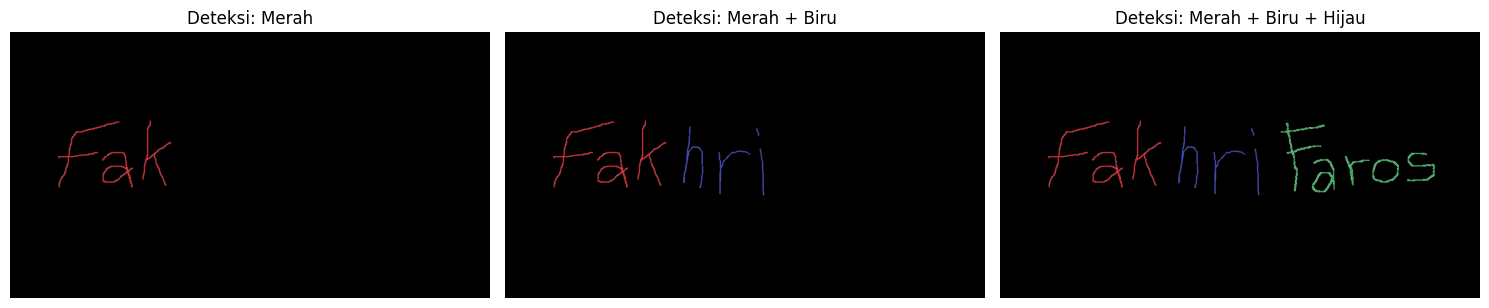

Threshold Merah : [np.int32(0), np.int32(10), np.int32(160), np.int32(180)]
Threshold Hijau : [np.int32(40), np.int32(80)]
Threshold Biru  : [np.int32(100), np.int32(140)]
Threshold Terurut: [np.int32(0), np.int32(10), np.int32(40), np.int32(80), np.int32(100), np.int32(140), np.int32(160), np.int32(180)]


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar
img = cv2.imread('citra_nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# --- Rentang Warna HSV ---
# Merah
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Hijau
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

# Biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# --- Masking Warna ---
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# --- Gabungan Mask ---
mask_rb = cv2.bitwise_or(mask_red, mask_blue)
mask_rgb = cv2.bitwise_or(mask_rb, mask_green)

# --- Terapkan Mask ke Gambar ---
hasil_red = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
hasil_rb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_rb)
hasil_rgb = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_rgb)

# --- Tampilkan Hasil Deteksi Warna ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(hasil_red)
plt.title('Deteksi: Merah')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hasil_rb)
plt.title('Deteksi: Merah + Biru')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hasil_rgb)
plt.title('Deteksi: Merah + Biru + Hijau')
plt.axis('off')

plt.tight_layout()
plt.show()

# --- Cetak Nilai Threshold ---
threshold_merah = [lower_red1[0], upper_red1[0], lower_red2[0], upper_red2[0]]
threshold_hijau = [lower_green[0], upper_green[0]]
threshold_biru = [lower_blue[0], upper_blue[0]]

# Gabungkan semua ambang batas dan urutkan
semua_threshold = sorted(set(threshold_merah + threshold_hijau + threshold_biru))

print("Threshold Merah :", threshold_merah)
print("Threshold Hijau :", threshold_hijau)
print("Threshold Biru  :", threshold_biru)
print("Threshold Terurut:", semua_threshold)
